### Abdul Musa-Yusuf

## Part 1

In [23]:
class City:
    def __init__(self, country_code, name, region, population, latitude, longitude):
        self.country_code = country_code
        self.name = name
        self.region = region
        self.population = population
        self.latitude = latitude
        self.longitude = longitude
        
    def getName(self):
        return self.name
    
    def getPopulation(self):
        return self.population
    
    def getLatitude(self):
        return self.latitude
    
    def getLongitude(self):
        return self.longitude
        
    def __str__(self):
        return f"{self.name},{self.population},{self.latitude},{self.longitude}"

## Part 2

In [24]:
cities = []
with open('world_cities.txt', 'r', encoding="utf-8") as t:
    for i in t.readlines():
        new_list = i.split(',')
        country_code, name, region, population, latitude, longitude = new_list
        population = int(population)
        latitude = float(latitude)
        longitude = float(longitude)
        city = City(country_code, name, region, population, latitude, longitude)
        cities.append(city)

## Part 3

In [26]:
# Performs the quicksort algorithm.

# Partition the sublist the_list[p ... r] so that the pivot
# (originally in the_list[r]) moves to the_list[q],
# all items in the_list[p ... q-1] are less than or equal to the pivot,
# and all items in the_list[q+1 ... r] are greater than the pivot.
# Return the index q where the pivot ends up.
def partition(the_list, p, r, compare_func):
    pivot = the_list[r]
    
    # Set up the indices i and j so that
    #    the_list[p ... i] contains items <= pivot,
    #    the_list[i+1 ... j-1] contains items > pivot, and
    #    the_list[j ... r-1] contains items not yet compared with the pivot.
    i = p - 1
    j = p
    while j < r:
        if compare_func(the_list[j], pivot):
            # Move this item into the section known to be <= pivot.
            i += 1
            (the_list[i], the_list[j]) = (the_list[j], the_list[i])
        j += 1
            
    # Get the pivot into the correct position.
    (the_list[i+1], the_list[r]) = (the_list[r], the_list[i+1])
    return i+1

# Sort the sublist the_list[p ... r] using the quicksort algorithm.
def quicksort(the_list, p, r, compare_func):
    if p < r:   # nothing to do if the sublist has fewer than 2 items
        q = partition(the_list, p, r, compare_func) # divide
        quicksort(the_list, p, q-1, compare_func)   # conquer smaller items
        quicksort(the_list, q+1, r, compare_func)   # conquer larger items

# Sort the_list by running quicksort on it.        
def sort(the_list, compare_func):
    quicksort(the_list, 0, len(the_list)-1, compare_func)

# Return True if city1 has the same or higher population than city2.
def compare_population(city1, city2):
    return city1.getPopulation() >= city2.getPopulation()

# Return True if city1 comes at or before city2 alphabetically.
def compare_name(city1, city2):
    return city1.getName().lower() <= city2.getName().lower()

# Return True if city1's latitude is less than or equal to city2's latitude.
def compare_latitude(city1, city2):
    return city1.getLatitude() <= city2.getLatitude()


# Writing to file..

sort(cities, compare_name)
with open('cities_alpha.txt', 'w') as writer:
    for line in cities:
        writer.write(f"{line.getName()},{line.getPopulation()},{line.getLatitude()},{line.getLongitude()}\n")


sort(cities, compare_population)
with open('cities_population.txt', 'w') as writer:
    for line in cities:
        writer.write(f"{line.getName()},{line.getPopulation()},{line.getLatitude()},{line.getLongitude()}\n")


sort(cities, compare_latitude)
with open('cities_latitude.txt', 'w') as writer:
    for line in cities:
        writer.write(f"{line.getName()},{line.getPopulation()},{line.getLatitude()},{line.getLongitude()}\n")


## Part 4

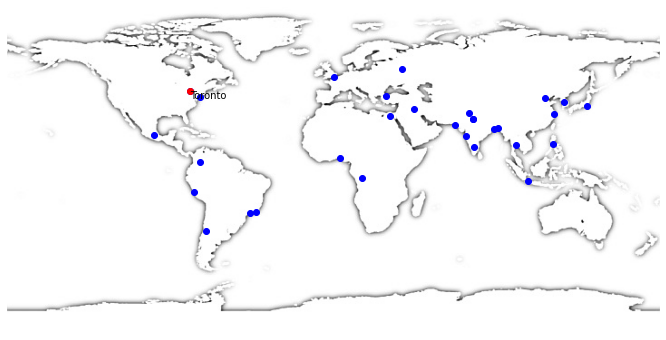

In [29]:
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# Convert a latitude and longitude to pixel locations.
def longlat_to_pixel(latitude, longitude):
    center_x = int(round((WIDTH / 2) + (WIDTH / 2) * (longitude / 180)))
    center_y = HEIGHT - int(round((HEIGHT / 2) + (HEIGHT / 2) * (latitude / 90)))
    return (center_x, center_y)


popular_cities = []
with open('cities_population.txt', 'r') as reader:
    for index, line in enumerate(reader.readlines()):
        if index == 30:
            break
        name, population, lat, longt = line.split(',')
        population = int(population)
        lat = float(lat)
        longt = float(longt)
        popular_cities.append([name, population, lat, longt])

        
WIDTH = 720 # image (world.jpg) width
HEIGHT = 360 # image height
DPI = 60 # display image at this dots-per-inch resolution

img = plt.imread("world.jpeg") #Downloaded the image as jpg
visited_cities = []
for p_city in popular_cities:
    plt.figure(figsize=(WIDTH/DPI,HEIGHT/DPI))
    plt.imshow(img) # Display the image
    plt.axis('off')
    x , y = longlat_to_pixel(p_city[2], p_city[3])

    visited_cities.append((x,y))
    
    for v_city in visited_cities:
        plt.plot(v_city[0], v_city[1], 'bo')
    
    plt.plot(x, y, 'ro')
    plt.text(x, y+8, p_city[0])
    
    plt.show()
    clear_output(wait=True)
    time.sleep(0.5)